# Time Series Forecasting - ARIMA

In [12]:
pip install -U setuptools

In [13]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyparsing!=3.0.5,>=2.0.2 in c:\users\tamojit\appdata\local\programs\python\python310\lib\site-packages (from packaging>=21.3->statsmodels>=0.13.2->pmdarima) (2.4.7)



In [14]:
import pandas as pd
import numpy as np

Read Data

In [15]:
# import csv dataset
df=pd.read_csv('divvy-tripdata_cleaned.csv',index_col=1,parse_dates=True)

# make into dataframe
df2=pd.DataFrame(df)

# which columns to include alongside column acting as index
cols=[3]
df2=df2[df2.columns[cols]]

# printing shape of dataset and its head
print('Shape of data',df2.shape)
df2.head()

Shape of data (76000, 1)


,trip_duration
start_time,
2013-08-16 17:40:00,2729
2014-07-14 17:17:00,277
2014-06-19 18:04:00,566
2014-07-09 19:46:00,637
2014-06-27 16:19:00,161


Plot your data

<AxesSubplot:xlabel='start_time'>

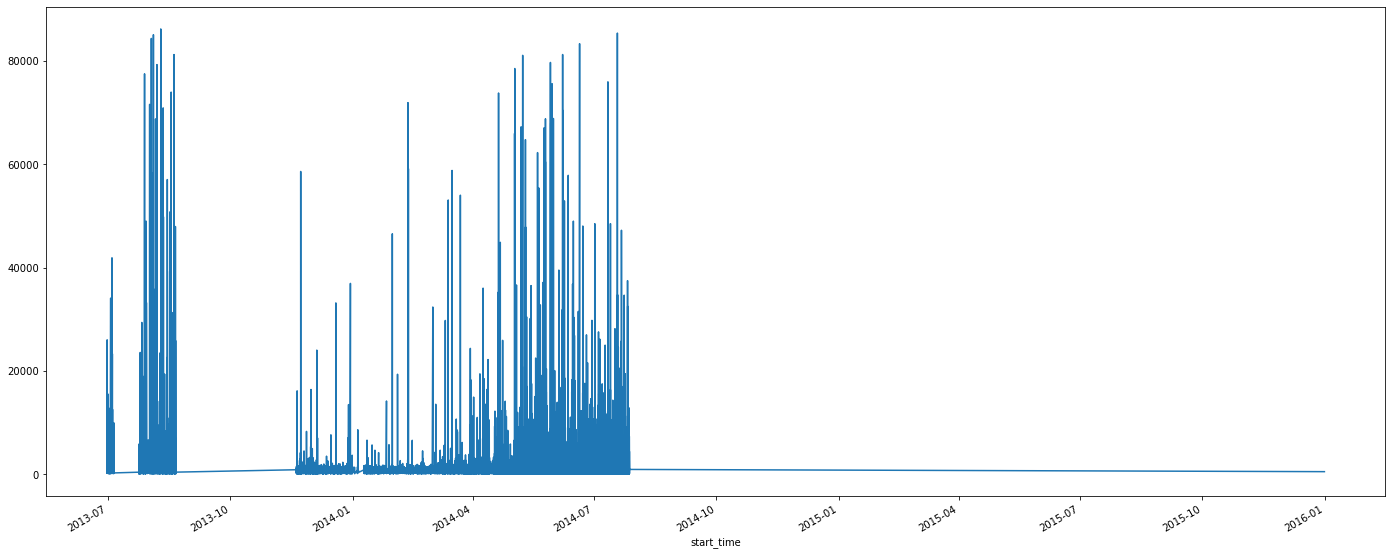

In [16]:
df2['trip_duration'].plot(figsize=(24,10))

Check for Stationarity

In [18]:
# performing "Augmented Dickey Fuller" test to check for stationarity of data

from statsmodels.tsa.stattools import adfuller

dftest=adfuller(df2['trip_duration'],autolag='AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ",dftest[1])
print("3. No. of Lags : ",dftest[2])
print("4. No. of Observations used for ADF Regression and Critical Value Calculation : ",dftest[3])
print("5. Critical Values :")
for key,val in dftest[4].items():
    print("\t",key, ": ",val)

1. ADF :  -275.94903092250775
2. P-Value :  0.0
3. No. of Lags :  0
4. No. of Observations used for ADF Regression and Critical Value Calculation :  75999
5. Critical Values :
	 1% :  -3.4304360474596383
	 5% :  -2.8615780314967068
	 10% :  -2.566790242857946


Figure out Order for ARIMA Model

In [19]:
from pmdarima import auto_arima
# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [20]:
# calling the auto_arima() function
# Auto ARIMA is going to try for different combinations (like (0,1,0), (0,1,1), (0,1,2), etc.) 
# and for every order it is going to assign a score called the AIC
# the goal is to minimize the AIC (Akaike’s Information Criterion)

stepwise_fit=auto_arima(df2['trip_duration'],trace=True,suppress_warnings=True)

# performing step-wise search to minimize AIC score

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1392042.923, Time=10.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1392035.558, Time=0.99 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1392037.483, Time=2.91 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1392037.487, Time=2.60 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1408673.207, Time=0.54 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1392039.484, Time=5.71 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 23.186 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                76000
Model:                        SARIMAX   Log Likelihood             -696015.779
Date:                Mon, 05 Dec 2022   AIC                        1392035.558
Time:                        16:29:46   BIC                        1392054.035
Sample:                             0   HQIC                       1392041.235
                              - 76000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1136.1780     15.935     71.299      0.000    1104.945    1167.411
sigma2      5.274e+06   3087.682   1708.125      0.000    5.27e+06    5.28e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):         997956307.88
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            20.21
Prob(H) (two-sided):                  0.00   Kurtosis:                       562.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
from statsmodels.tsa.arima_model import ARIMA

Split Data into Training and Testing

In [22]:
print(df2.shape)
train=df2.iloc[:-30]
test=df2.iloc[-30:]
print(train.shape,test.shape)

(76000, 1)
(75970, 1) (30, 1)


Train the Model

In [23]:
# model=ARIMA(train['trip_duration'],order=(0,0,1))
# model=model.fit()
# model.summary()

Make Predictions on Test Set

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start-start,end=end,type='levels')
print(pred)
# pred.index=df.index[start:end-1]
# print(pred)

In [ ]:
pred.plot(legend=True)
test['trip_duration'].plot(legend=True)

In [ ]:
test['trip_duration'].mean()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['trip_duration']))
print(rmse)

In [ ]:
model2=ARIMA(df2['trip_duration'],order=(1,0,0))
model2=model2.fit()
df2.tail()

For Future Dates

In [ ]:
index_future_dates=pd.date_range(start='2014-01-23',end='2016-02-10')
# print(index_future_dates)
pred=model2.predict(start=len(df2),end=len(df2)+30,type='levels').rename('ARIMA Predictions')
# print(comp_pred)
pred.index=index_future_dates
# print(comp_pred)

In [ ]:
pred.plot(figsize=(12,5),legend=True)